In [1]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install matplotlib  pandas  seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 119.2 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
#imported the necessary libraries and loaded the dataset

import pandas as pd    
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
df = pd.read_csv(r'/home/siddharth/Desktop/ReBIT_Assg/ReBIT-Assg/Dataset/Finance_data.csv')
df.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [16]:
# separated data into two sub-data sets based on customers who prefer using Investment_Avenues and who do not
df_yes_ia = df.loc[df['Investment_Avenues'] == 'Yes']
df_yes_ia.head()

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
6,Female,27,Yes,3,6,4,2,5,1,7,...,3-5 years,Monthly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,High Interest Rates,Financial Consultants


In [4]:
#created a pivot table, which tells how many customers invest daily,monthly,weekly and on what prospects do they invest
pd.pivot_table(data = df, index = ['Invest_Monitor'], columns = ['Avenue'], aggfunc= 'size').fillna(0)


Avenue,Equity,Fixed Deposits,Mutual Fund,Public Provident Fund
Invest_Monitor,,,,
Daily,3.0,0.0,1.0,0.0
Monthly,5.0,9.0,13.0,2.0
Weekly,2.0,0.0,4.0,1.0


<Axes: xlabel='Invest_Monitor'>

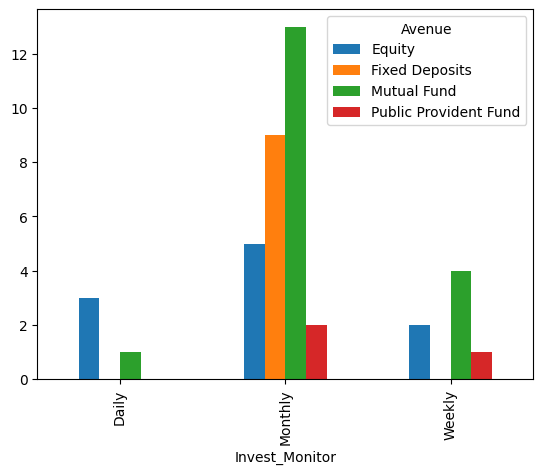

In [12]:
# plotted the above pivot_table
pd.pivot_table(data = df, index = ['Invest_Monitor'], columns = ['Avenue'], aggfunc= 'size').fillna(0).plot.bar()

In [13]:
## created another pivot table, which is an extension of the above one, in which look into the count of objectives of the customers who invest in the scheme
pd.pivot_table(data = df, index = ['Invest_Monitor'], columns = ['Avenue','What are your savings objectives?'], aggfunc= 'size').fillna(0)

Avenue                                 Equity                 Fixed Deposits  \
What are your savings objectives? Health Care Retirement Plan      Education   
Invest_Monitor                                                                 
Daily                                     0.0             3.0            0.0   
Monthly                                   2.0             3.0            1.0   
Weekly                                    1.0             1.0            0.0   

Avenue                                                        Mutual Fund  \
What are your savings objectives? Health Care Retirement Plan   Education   
Invest_Monitor                                                              
Daily                                     0.0             0.0         0.0   
Monthly                                   5.0             3.0         1.0   
Weekly                                    0.0             0.0         1.0   

Avenue                                                         \
What are your savings objectives? Health Care Retirement Plan   
Invest_Monitor                                                  
Daily                                     0.0             1.0   
Monthly                                   1.0            11.0   
Weekly                                    2.0             1.0   

Avenue                            Public Provident Fund                  
What are your savings objectives?           Health Care Retirement Plan  
Invest_Monitor                                                           
Daily                                               0.0             0.0  
Monthly                                             1.0             1.0  
Weekly                                              1.0             0.0

In [24]:
a = pd.pivot_table(data = df, index = ['Invest_Monitor'], columns = ['Avenue','What are your savings objectives?'], aggfunc= 'size').fillna(0)
b= a.loc[a.index == 'Monthly']
col1 = b['Mutual Fund']['Education']
col1



Invest_Monitor
Monthly    1.0
Name: Education, dtype: float64

In [36]:
sd= pd.pivot_table(data = df, index = ['Avenue'], columns = ['Reason_Equity'],aggfunc='size')
sd.loc[sd.index == 'Equity'].fillna(0)

Reason_Equity,Capital Appreciation,Dividend,Liquidity
Avenue,,,
Equity,8.0,2.0,0.0


In [23]:
sd = pd.pivot_table(data = df, index = ['Avenue'], columns = ['Reason_Mutual'],aggfunc='size')
sd.loc[sd.index == 'Mutual Fund']

Reason_Mutual,Better Returns,Fund Diversification,Tax Benefits
Avenue,,,
Mutual Fund,11.0,5.0,2.0


In [15]:
sd = pd.pivot_table(data = df, index = ['Avenue'], columns = ['Reason_FD'],aggfunc='size')
sd.loc[sd.index == 'Fixed Deposits'].fillna(0)


Reason_FD,Fixed Returns,High Interest Rates,Risk Free
Avenue,,,
Fixed Deposits,5.0,0.0,4.0


In [35]:
sd=pd.pivot_table(data = df, index = ['Avenue'], columns = ['Reason_Bonds'],aggfunc='size')
sd.loc[sd.index == 'Public Provident Fund'].fillna(0)

Reason_FD,Fixed Returns,High Interest Rates,Risk Free
Avenue,,,
Public Provident Fund,1.0,0.0,2.0


In [37]:
df.columns


Index(['gender', 'age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold',
       'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration',
       'Invest_Monitor', 'Expect', 'Avenue',
       'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual',
       'Reason_Bonds', 'Reason_FD', 'Source'],
      dtype='object')

In [43]:
df['Stock_Marktet'].unique()
df['Objective'].unique()
df['Factor'].unique()

array(['Returns', 'Locking Period', 'Risk'], dtype=object)

In [42]:
# looks for the count of the Avenue against it's specific Factor by customers
pd.pivot_table(data=df,index=['Avenue'],columns=['Factor'],aggfunc='size').fillna(0)

Factor,Locking Period,Returns,Risk
Avenue,,,
Equity,0.0,8.0,2.0
Fixed Deposits,0.0,5.0,4.0
Mutual Fund,1.0,11.0,6.0
Public Provident Fund,0.0,1.0,2.0


In [44]:
df['Objective'].unique()

array(['Capital Appreciation', 'Income', 'Growth'], dtype=object)

In [52]:
# looks for the Avenue and it's subsequent objective for choosing the same by the customers
a= pd.pivot_table(data=df,index=['Avenue'],columns=['Objective'],aggfunc='size').fillna(0)
pd.DataFrame(a)


Objective,Capital Appreciation,Growth,Income
Avenue,,,
Equity,6.0,2.0,2.0
Fixed Deposits,6.0,3.0,0.0
Mutual Fund,13.0,4.0,1.0
Public Provident Fund,1.0,2.0,0.0


Objective             Capital Appreciation    Growth    Income
Objective                                                     
Capital Appreciation              1.000000  0.882231  0.388182
Growth                            0.882231  1.000000 -0.090909
Income                            0.388182 -0.090909  1.000000


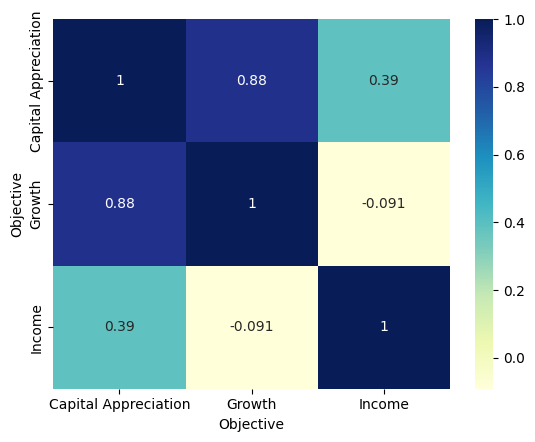

In [53]:
import seaborn as sns
print(a.corr(numeric_only=True))

# Plotting correlation heatmap
dataplot = sns.heatmap(a.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

In [58]:
pd.pivot_table(data=df,index=['Duration'],columns=['Avenue','Expect'],aggfunc='size').fillna(0)

Avenue             Equity                 Fixed Deposits         Mutual Fund  \
Expect            10%-20% 20%-30% 30%-40%        20%-30% 30%-40%     10%-20%   
Duration                                                                       
1-3 years             0.0     4.0     0.0            4.0     0.0         1.0   
3-5 years             0.0     3.0     1.0            4.0     1.0         1.0   
Less than 1 year      1.0     1.0     0.0            0.0     0.0         0.0   
More than 5 years     0.0     0.0     0.0            0.0     0.0         0.0   

Avenue                            Public Provident Fund          
Expect            20%-30% 30%-40%               20%-30% 30%-40%  
Duration                                                         
1-3 years             8.0     1.0                   0.0     0.0  
3-5 years             6.0     0.0                   1.0     2.0  
Less than 1 year      0.0     0.0                   0.0     0.0  
More than 5 years     1.0     0.0                   0.0     0.0

In [59]:
#gets the pivot table for the count of customers who choose a particular avenue and what amount of return they expect on that avenue and for what amount of duration
b=pd.pivot_table(data=df,index=['Duration'],columns=['Avenue','Expect'],aggfunc='size').fillna(0)
pd.DataFrame(b)

Avenue             Equity                 Fixed Deposits         Mutual Fund  \
Expect            10%-20% 20%-30% 30%-40%        20%-30% 30%-40%     10%-20%   
Duration                                                                       
1-3 years             0.0     4.0     0.0            4.0     0.0         1.0   
3-5 years             0.0     3.0     1.0            4.0     1.0         1.0   
Less than 1 year      1.0     1.0     0.0            0.0     0.0         0.0   
More than 5 years     0.0     0.0     0.0            0.0     0.0         0.0   

Avenue                            Public Provident Fund          
Expect            20%-30% 30%-40%               20%-30% 30%-40%  
Duration                                                         
1-3 years             8.0     1.0                   0.0     0.0  
3-5 years             6.0     0.0                   1.0     2.0  
Less than 1 year      0.0     0.0                   0.0     0.0  
More than 5 years     1.0     0.0                   0.0     0.0

Avenue                           Equity                     Fixed Deposits  \
Expect                          10%-20%   20%-30%   30%-40%        20%-30%   
Avenue                Expect                                                 
Equity                10%-20%  1.000000 -0.365148 -0.333333      -0.577350   
                      20%-30% -0.365148  1.000000  0.365148       0.948683   
                      30%-40% -0.333333  0.365148  1.000000       0.577350   
Fixed Deposits        20%-30% -0.577350  0.948683  0.577350       1.000000   
                      30%-40% -0.333333  0.365148  1.000000       0.577350   
Mutual Fund           10%-20% -0.577350  0.948683  0.577350       1.000000   
                      20%-30% -0.647298  0.945439  0.388379       0.971666   
                      30%-40% -0.333333  0.730297 -0.333333       0.577350   
Public Provident Fund 20%-30% -0.333333  0.365148  1.000000       0.577350   
                      30%-40% -0.333333  0.365148  1.000000     

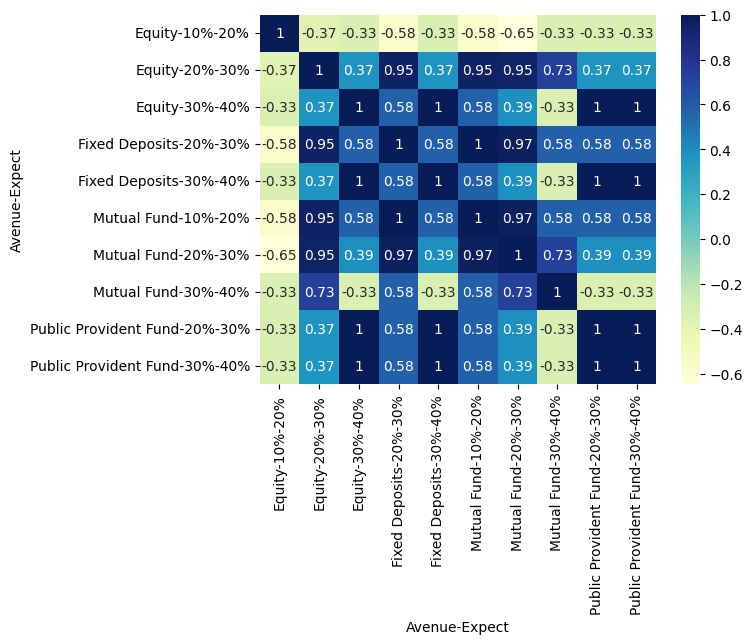

In [60]:
import seaborn as sns
print(b.corr(numeric_only=True))

# Plotting correlation heatmap
dataplot = sns.heatmap(b.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

In [12]:
#makes a another pivot table which tells how many customers based on age prefer the various investment schemes
age_services = pd.pivot_table(data = df,index = ['age'],values = ['Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold'],aggfunc=np.sum)
age_services

/tmp/ipykernel_5181/3377506077.py:1: FutureWarning: The operation <function sum at 0x725a5c334ca0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  age_services = pd.pivot_table(data = df,index = ['age'],values = ['Investment_Avenues', 'Mutual_Funds', 'Equity_Market',


,Debentures,Equity_Market,Fixed_Deposits,Gold,Government_Bonds,Mutual_Funds,PPF
age,,,,,,,
21,10,5,11,12,8,3,7
22,3,1,6,5,7,2,4
23,2,3,5,7,1,4,6
24,12,10,10,16,18,11,7
25,20,11,8,16,16,9,4
26,25,14,7,27,19,10,10
27,38,27,28,45,28,19,11
28,14,5,9,12,9,5,2
29,32,17,14,29,27,13,8


/tmp/ipykernel_5181/1521832236.py:1: FutureWarning: The operation <function sum at 0x725a5c334ca0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  pd.pivot_table(data = df,index = ['age'],values = ['Investment_Avenues', 'Mutual_Funds', 'Equity_Market',


<Axes: xlabel='age'>

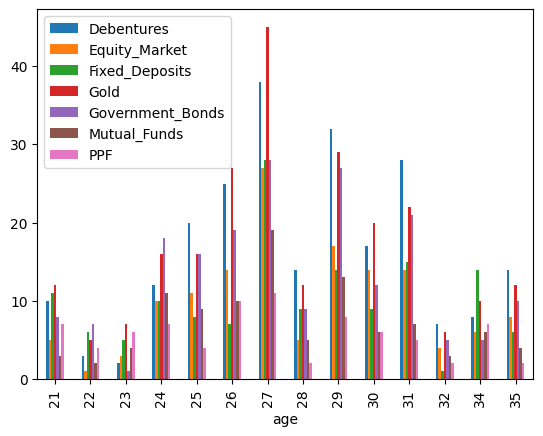

In [13]:
pd.pivot_table(data = df,index = ['age'],values = ['Investment_Avenues', 'Mutual_Funds', 'Equity_Market',
       'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold'],aggfunc=np.sum).plot.bar()

                  Debentures  Equity_Market  Fixed_Deposits      Gold  \
Debentures          1.000000       0.939936        0.722829  0.942233   
Equity_Market       0.939936       1.000000        0.785541  0.979182   
Fixed_Deposits      0.722829       0.785541        1.000000  0.806620   
Gold                0.942233       0.979182        0.806620  1.000000   
Government_Bonds    0.941139       0.898155        0.683174  0.900963   
Mutual_Funds        0.838990       0.910643        0.774141  0.917817   
PPF                 0.545335       0.665918        0.654867  0.735816   

                  Government_Bonds  Mutual_Funds       PPF  
Debentures                0.941139      0.838990  0.545335  
Equity_Market             0.898155      0.910643  0.665918  
Fixed_Deposits            0.683174      0.774141  0.654867  
Gold                      0.900963      0.917817  0.735816  
Government_Bonds          1.000000      0.878003  0.576247  
Mutual_Funds              0.878003      1.000000 

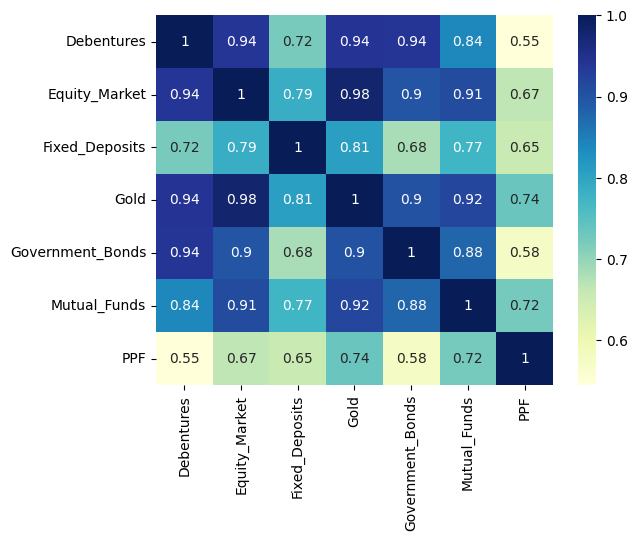

In [14]:
import seaborn as sns
print(age_services.corr(numeric_only=True))

# Plotting correlation heatmap
dataplot = sns.heatmap(age_services.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()